In [230]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.under_sampling import RandomUnderSampler
# import xgboost as xgb
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, roc_auc_score, plot_roc_curve, f1_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV



In [231]:
LoanStatData = pd.read_csv('./Loan_status_2007-2020Q3.gzip')
#Checking the data
LoanStatData.describe()

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/3177714401.py:1: DtypeWarning:

Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,2.925493e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925488e+06,2.922384e+06,2.925463e+06,2.925492e+06,2.925492e+06,...,197824.000000,197824.000000,197824.000000,143638.000000,182076.000000,143638.000000,143637.000000,179240.000000,182076.000000,182076.000000
mean,8.697419e+04,1.535878e+04,1.535470e+04,1.534005e+04,4.523914e+02,7.993727e+04,1.929648e+01,2.897012e-01,7.005110e+02,7.045112e+02,...,12.544398,0.038327,0.067545,2.233427,119.887400,2.233427,2.323148,369.367460,11993.128927,745.504875
std,8.048842e+04,9.478383e+03,9.477145e+03,9.480634e+03,2.729478e+02,1.117476e+05,1.571977e+01,8.436819e-01,3.376565e+01,3.376653e+01,...,8.206977,0.362390,0.371836,0.565689,247.522976,0.565689,6.179453,468.696526,9162.902724,2095.316599
min,0.000000e+00,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.284100e+04,8.000000e+03,8.000000e+03,8.000000e+03,2.535000e+02,4.700000e+04,1.208000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,104.280000,4749.142500,259.040000
50%,6.892500e+04,1.300000e+04,1.300000e+04,1.300000e+04,3.823000e+02,6.600000e+04,1.810000e+01,0.000000e+00,6.950000e+02,6.990000e+02,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,249.474420,9967.160000,423.200000
75%,1.072940e+05,2.000000e+04,2.000000e+04,2.000000e+04,6.039200e+02,9.500000e+04,2.488000e+01,0.000000e+00,7.200000e+02,7.240000e+02,...,17.000000,0.000000,0.000000,2.000000,101.940000,2.000000,0.000000,482.532500,17640.670000,679.580000
max,4.210940e+05,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,121.000000,21.000000,23.000000,4.000000,2797.500000,4.000000,82.000000,11581.820000,42135.550000,40270.980000


In [232]:
LoanStatData = LoanStatData[LoanStatData['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
LoanStatData.dtypes

Unnamed: 0                                      int64
id                                             object
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [233]:
#creatubg a column for the year in the data set
LoanStatData['year'] = pd.to_datetime(LoanStatData['issue_d']).dt.year

In [234]:
#creating FICO for the setting range
LoanStatData['fico'] = LoanStatData.apply(lambda r: (r.fico_range_low + r.fico_range_high) / 2, axis=1)


[Text(0.5, 1.0, 'Taking new loans to pay for other assets is loan debt consolidation ')]

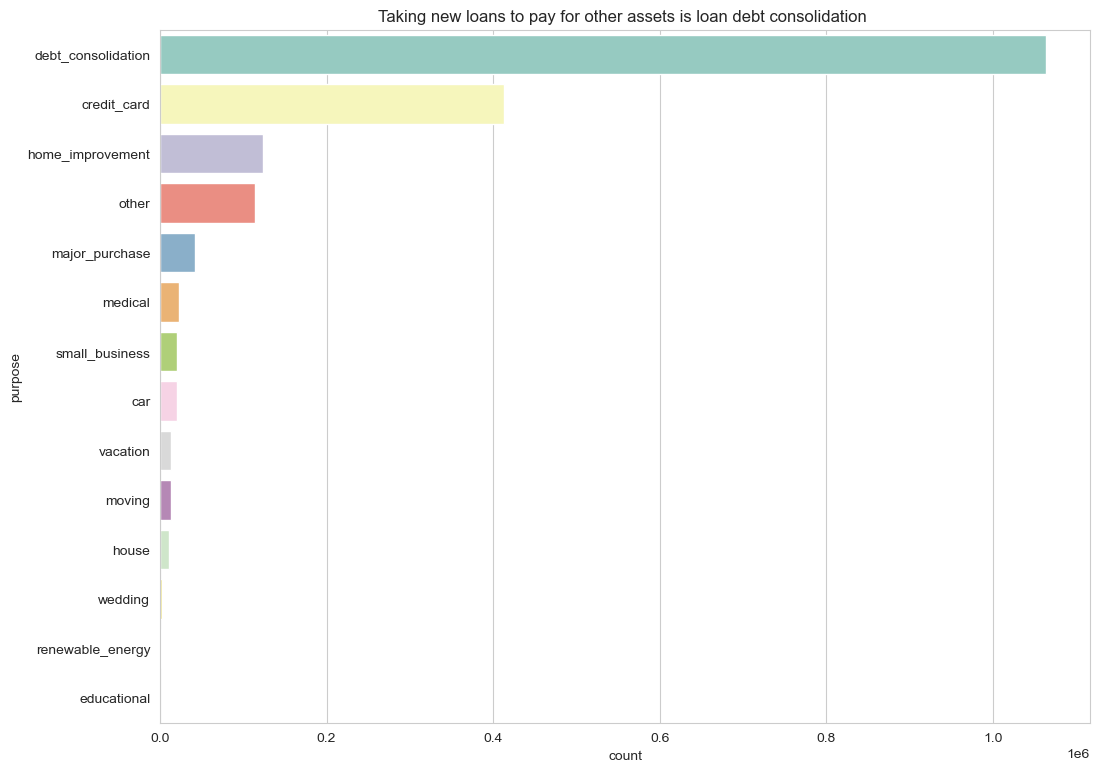

In [235]:
plt.figure(figsize=(12,9))
ax = sns.countplot(y="purpose", data=LoanStatData, palette="Set3",
                   order=LoanStatData['purpose'].value_counts().index,
                   dodge=False)
ax.set(title="Taking new loans to pay for other assets is loan debt consolidation ")

In [236]:
ax.get_figure().savefig('1_1.jpg')

In [237]:
#maximum amount of loans in the dataset are four states that are from California, Texas, New York and Florida.
#finding frequency of loans given to different states
statewise_loan_freq = LoanStatData.groupby(['addr_state'], as_index=False).size()
statewise_loan_freq

,addr_state,size
0,AK,4343
1,AL,22802
2,AR,14087
3,AZ,45521
4,CA,264525
5,CO,40501
6,CT,28161
7,DC,4549
8,DE,5264
9,FL,133643


In [238]:
fig = go.Figure(
    data=go.Choropleth(
        locations=list(statewise_loan_freq['addr_state'].values),
        z = list(statewise_loan_freq['size'].values),
        locationmode = 'USA-states',
        colorscale = 'Rainbow'
    ))

fig.update_layout(
    title_text = 'Offered Loans from different State',
    geo_scope='usa',
)

fig.show()

In [239]:
dti_non_null = LoanStatData[~LoanStatData['dti'].isnull()]

In [240]:
dti_non_null

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,year,fico
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,737.0
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,742.0
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,737.0
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,692.0
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,672.0
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,727.0
2925490,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,707.0
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,672.0


[Text(0.5, 1.0, 'Debt-to-Income ratio has many outliers - Very right-skewed.')]

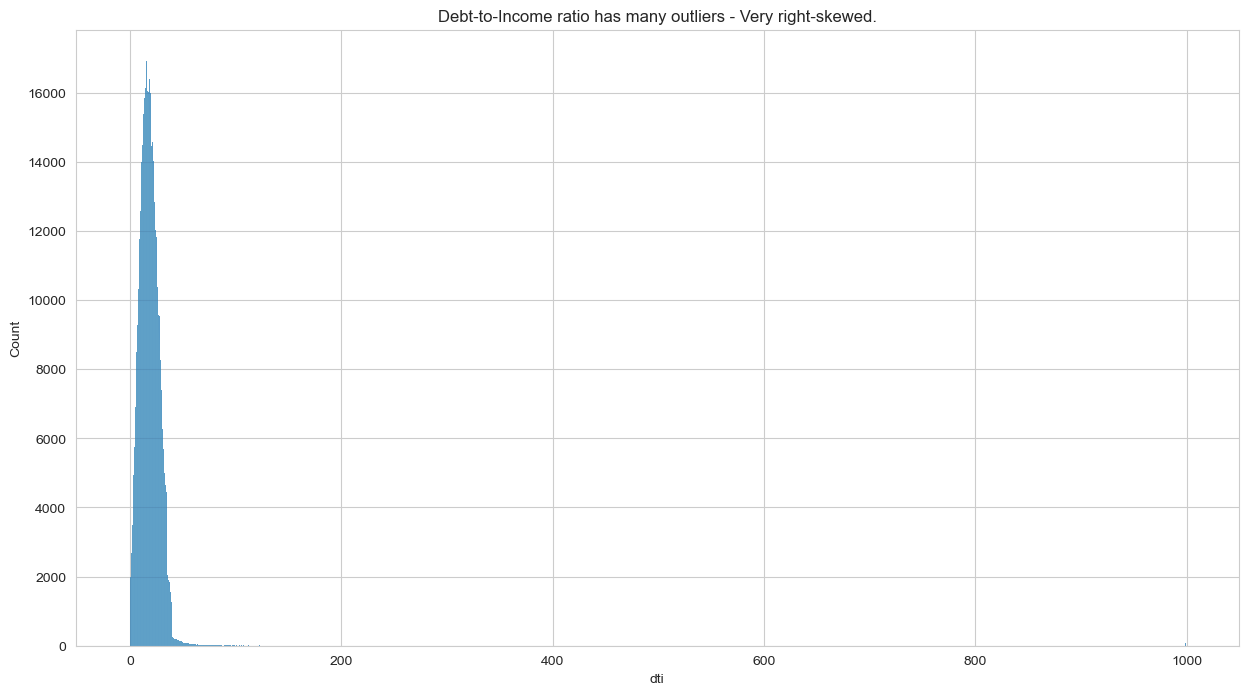

In [241]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", data=dti_non_null)
ax.set(title="Debt-to-Income ratio has many outliers - Very right-skewed.")


[Text(0.5, 1.0, 'Debt-to-Income ratio below 40 is somewhat normal')]

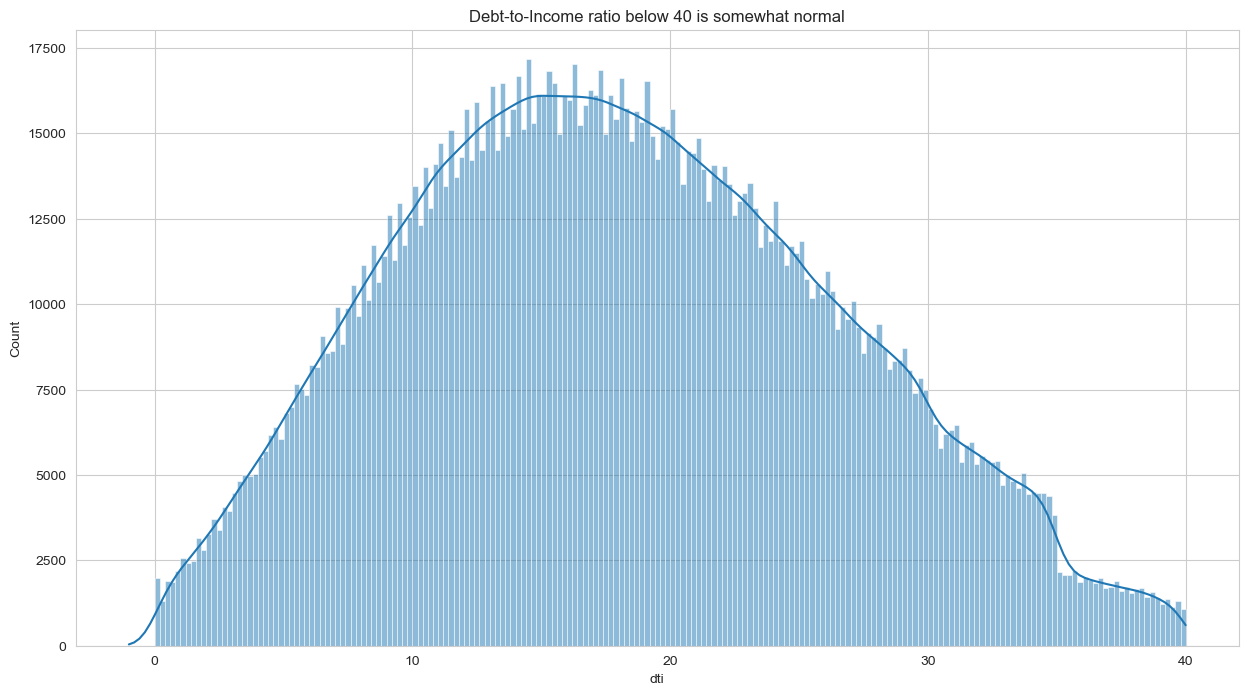

In [242]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", kde=True, data=dti_non_null[dti_non_null.dti <= 40])
ax.set(title="Debt-to-Income ratio below 40 is somewhat normal")

[Text(0.5, 1.0, "The # of open credit lines in the borrower's credit file is right-skewed.")]

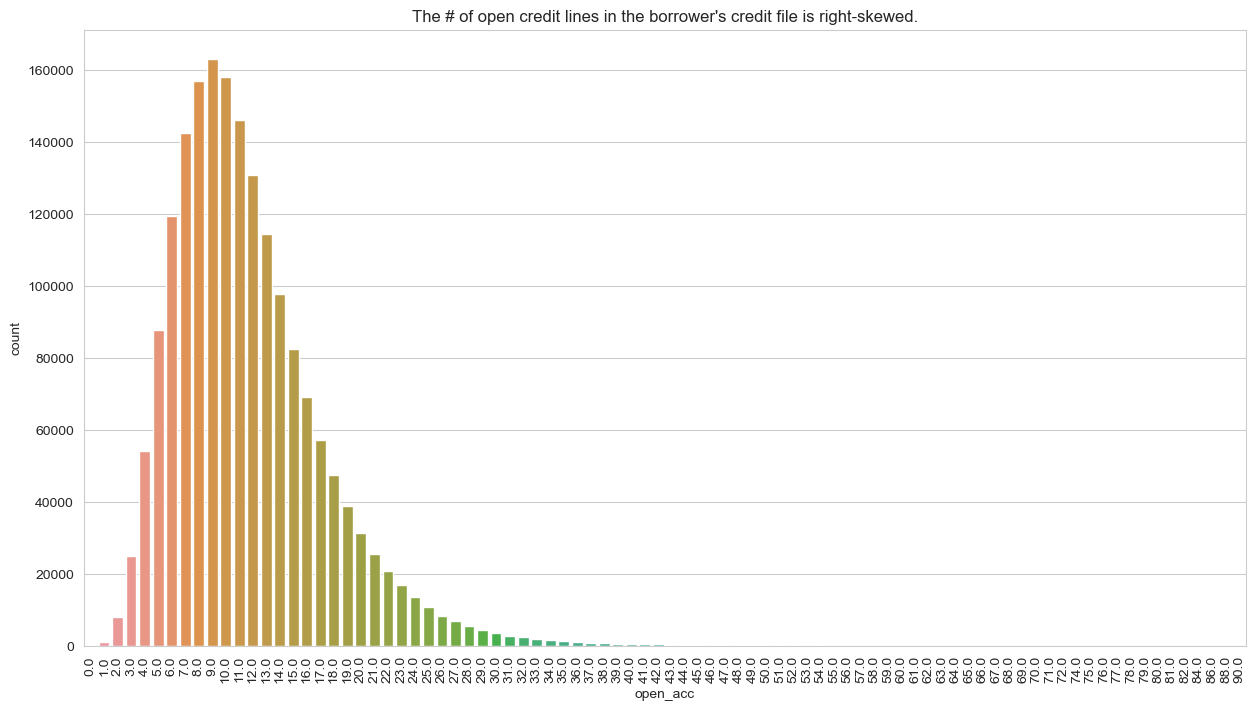

In [246]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
ax = sns.countplot(x="open_acc", data=LoanStatData, dodge=False)
ax.set(title="The # of open credit lines in the borrower's credit file is right-skewed.")

[Text(0.5, 1.0, 'Total credit revolving amount is right-skewed')]

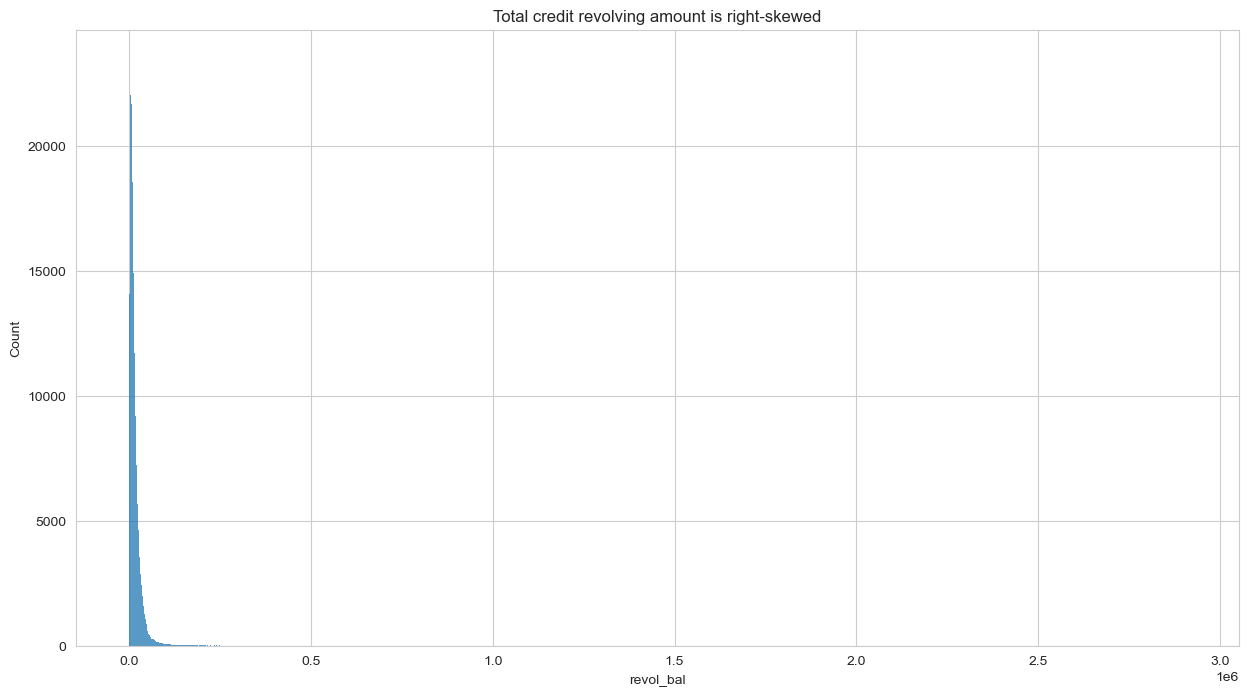

In [247]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="revol_bal",data=LoanStatData)
ax.set(title="Total credit revolving amount is right-skewed")

In [248]:
#taking top 50 employment titles.
top_emp_titles = set(LoanStatData.emp_title.value_counts()[:50].index.values) - {''}

[Text(0.5, 1.0, 'Director, Engineer, Attorney, Vice President and President have the highest grade A category loans.')]

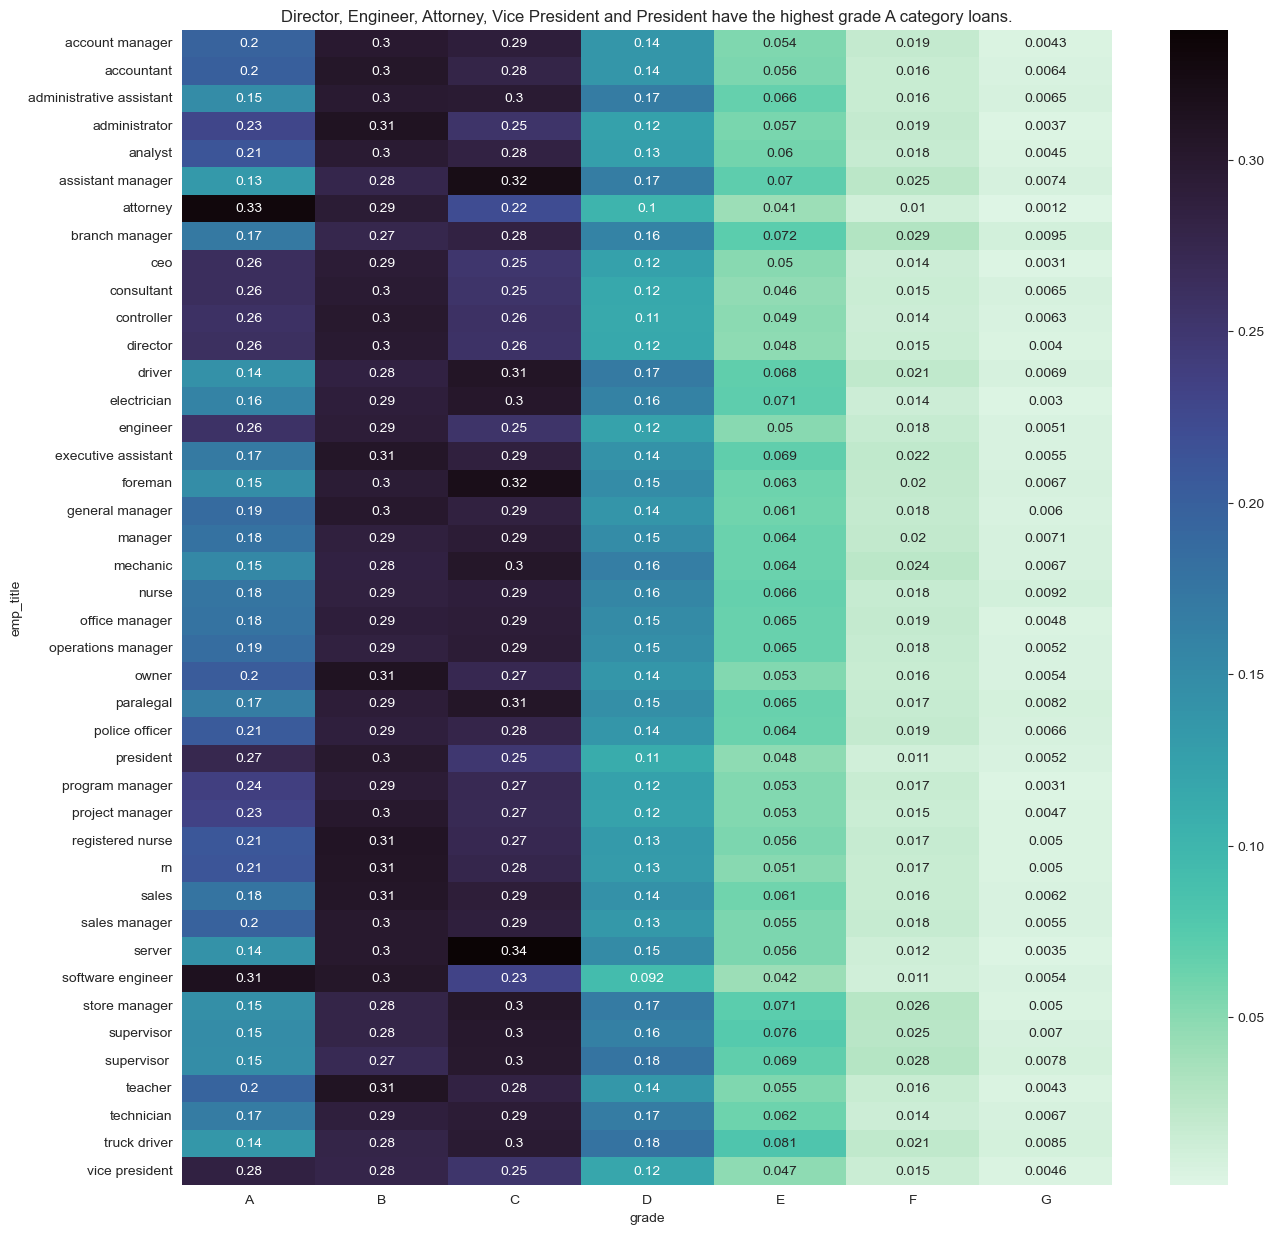

In [249]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(pd.crosstab(LoanStatData[LoanStatData['emp_title'].isin(top_emp_titles)]['emp_title'].str.lower(),
                             LoanStatData[LoanStatData['emp_title'].isin(top_emp_titles)]['grade'],
                             normalize='index'),
                 annot=True,
                 cmap="mako_r")
ax.set(title="Director, Engineer, Attorney, Vice President and President have the highest grade A category loans.")

[Text(0.5, 1.0, 'Distribution of loan amount through a the years')]

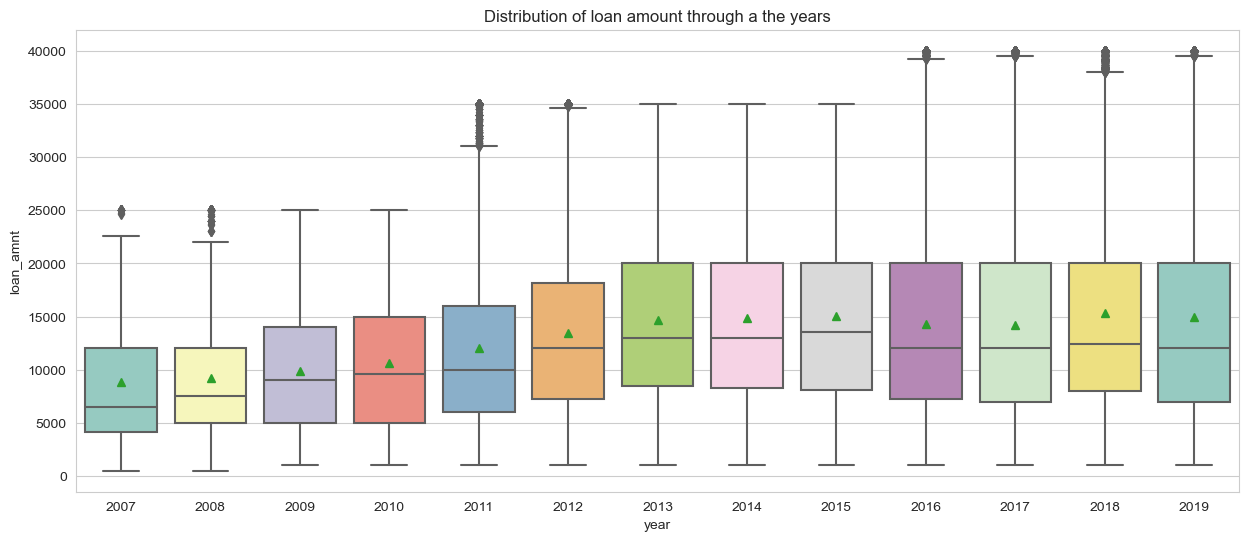

In [250]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="year", y="loan_amnt", palette="Set3",
                 data=LoanStatData[LoanStatData['year'] != 2020], showmeans=True)
ax.set(title="Distribution of loan amount through a the years")

In [251]:
bins = [600, 650, 700, 750, 800, 850]
LoanStatData['fico_bins'] = pd.cut(LoanStatData['fico'], bins).astype('str')

[Text(0.5, 1.0, 'Interest rates over the years- for different FICO score ranges)')]

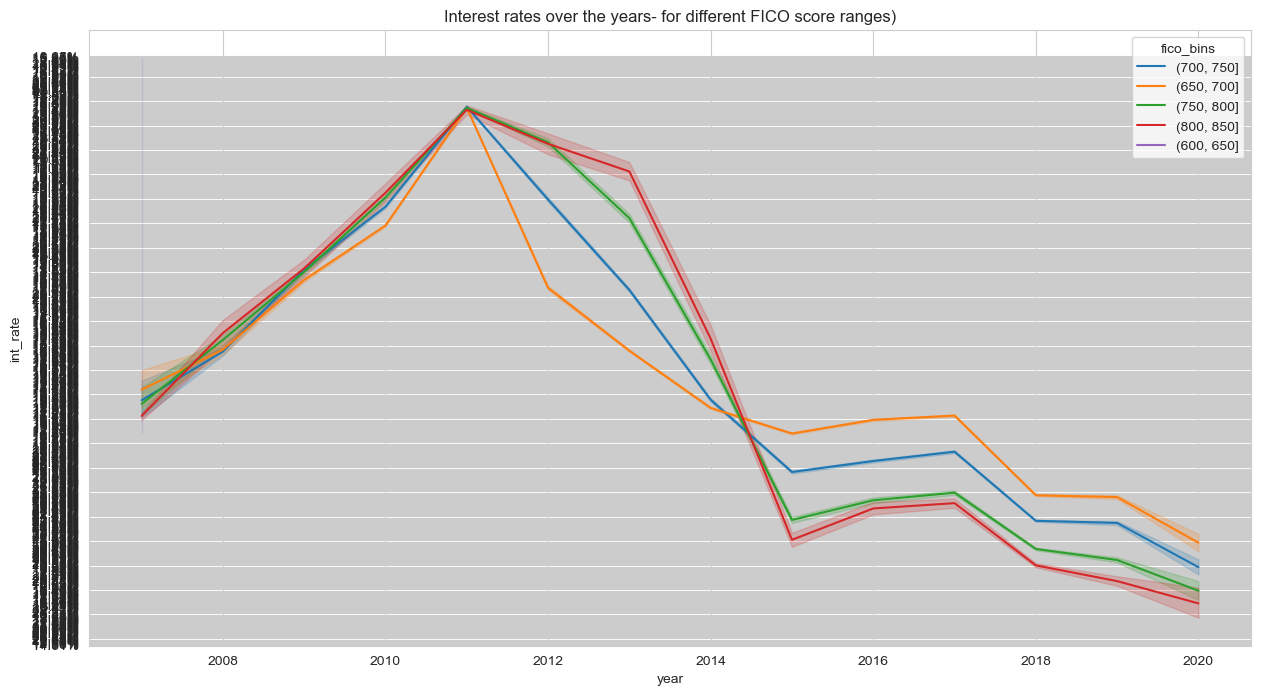

In [252]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=LoanStatData, x="year", y="int_rate", hue="fico_bins")
ax.set(title="Interest rates over the years- for different FICO score ranges)")

In [253]:
LoanStatData[LoanStatData['fico_bins'] == '(600, 650]'].year
LoanStatData

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,year,fico,fico_bins
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,737.0,"(700, 750]"
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,742.0,"(700, 750]"
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,737.0,"(700, 750]"
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,692.0,"(650, 700]"
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,697.0,"(650, 700]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,672.0,"(650, 700]"
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,727.0,"(700, 750]"
2925490,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,707.0,"(700, 750]"
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,672.0,"(650, 700]"


In [254]:

# Data_Loan= LoanStatData[['grade','int_rate', "application_type"]]
# Data_Loan
# plt.figure(figsize=(15, 10))
# ax = sns.boxplot(x=Data_Loan['grade'], y="int_rate", hue="application_type", palette="Set2",
#                  order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
#                  data=Data_Loan)
# ax.set(title="Interest rates increase as grade goes from A to G and application goes from individual to joint.")
# plt.legend(loc='lower right')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, '# of Loans'),
 Text(0.5, 1.0, 'Loans graded A have good repayment chances and it slowly decreases as the grade approches F/G.')]

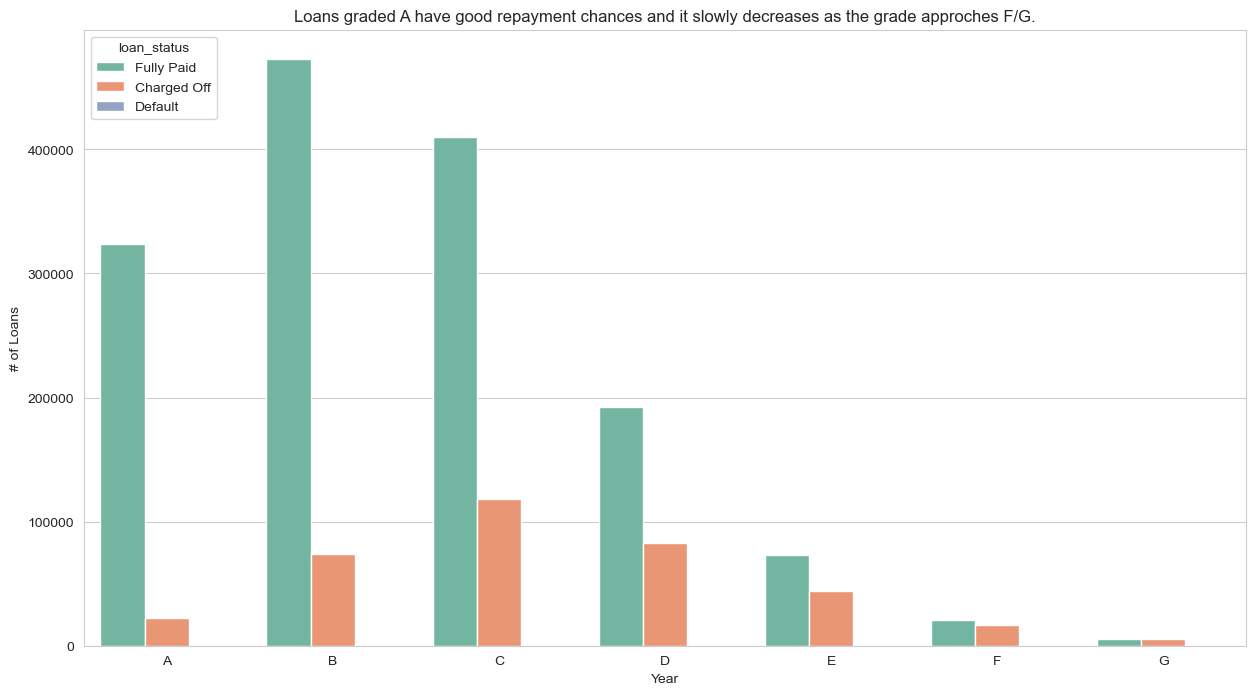

In [255]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="grade", hue="loan_status", data=LoanStatData, palette="Set2",
                   order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.set(xlabel='Year', ylabel='# of Loans',
       title="Loans graded A have good repayment chances and it slowly decreases as the grade approches F/G.")

In [256]:
# plt.figure(figsize=(15, 6))
# ax = sns.boxplot(x="loan_status", y="int_rate", palette="Set3", data=LoanStatData)
# ax.set(title="Loans with higher interest rate are more likely to default or be charged off.")


[Text(0.5, 1.0, 'Loans with higher loan amount are more likely to default or be charged off.')]

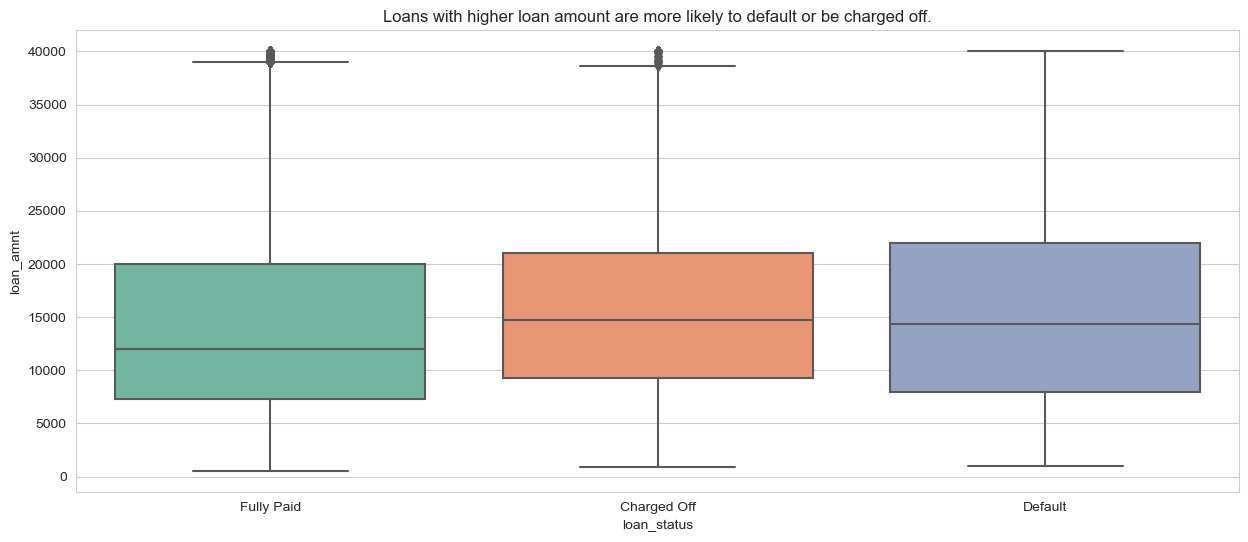

In [257]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="loan_status", y="loan_amnt", palette="Set2", data=LoanStatData)
ax.set(title="Loans with higher loan amount are more likely to default or be charged off.")

In [258]:
#MODELING


In [259]:
# Only keeping verified data form trainning Data.
LoanStatData = LoanStatData[LoanStatData['verification_status'].isin(['Verified', 'Source Verified'])]

In [260]:
row_count = len(LoanStatData)

In [261]:
na_count = LoanStatData.isnull().sum()

In [262]:
l = []
for col_name, count in na_count.iteritems():
    l.append([col_name, count, int((count/row_count) * 100)])

na_df = pd.DataFrame(columns=['col_name', 'count', 'percent'], data = l)

In [263]:
pd.set_option('display.max_rows', 500)

In [264]:
LoanStatData.drop(na_df[na_df.percent >= 90].col_name.to_list(), axis=1, inplace=True)

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/134500990.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [265]:
fill_with_0s = ['max_bal_bc', 'mort_acc', 'mths_since_last_major_derog', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'open_rv_12m', 'open_rv_24m', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'total_cu_tl']


In [266]:
remove = ['all_util', 'hardship_flag', 'total_bc_limit', 'Unnamed: 0']

In [267]:
fill_with_neg1 = ['mths_since_last_delinq', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'revol_util', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq']

In [268]:
# Removing columns that we dont want to keep.
LoanStatData.drop(remove, axis=1, inplace=True)

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/840634852.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
# Filling NaNs with 0s.
for col in fill_with_0s:
    LoanStatData[col].fillna(0, inplace=True)

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/4101374237.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [270]:
# Filling NaNs with -1.
for col in fill_with_neg1:
    LoanStatData[col].fillna(-1, inplace=True)

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/2776313128.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [271]:
# Creating target variable.
LoanStatData['default'] = LoanStatData['loan_status'].map({'Fully Paid':0,'Charged Off':1, 'Default':1})

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/3655570390.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [272]:
LoanStatData['emp_length'].fillna('< 1 year', inplace=True)
LoanStatData['emp_title'].fillna('', inplace=True)
LoanStatData['last_credit_pull_d'].fillna('', inplace=True)
LoanStatData['last_pymnt_d'].fillna('', inplace=True)
LoanStatData['title'].fillna('', inplace=True)
LoanStatData['zip_code'].fillna('xxxxx', inplace=True)

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/1741654695.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/1741654695.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/1741654695.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipyker

In [273]:
LoanStatData = LoanStatData.set_index(['id'], drop=True)

In [274]:
# Columns to keep.
keep = ['year',
        'avg_cur_bal',
        'default',
        'fico',
        'loan_amnt',
        'term',
        'int_rate',
        'installment',
        'sub_grade',
        'emp_length',
        'home_ownership',
        'annual_inc',
        'purpose',
        'addr_state',
        'dti',
        'earliest_cr_line',
        'inq_last_6mths',
        'open_acc',
        'pub_rec',
        'initial_list_status',
        'mths_since_last_major_derog',
        'application_type',
        'acc_now_delinq',
        'tot_cur_bal',
        'open_acc_6m',
        'open_act_il',
        'open_il_12m',
        'mths_since_rcnt_il',
        'total_bal_il',
        'open_rv_12m',
        'max_bal_bc',
        'total_cu_tl',
        'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op',
        'mo_sin_rcnt_rev_tl_op',
        'mo_sin_rcnt_tl',
        'mort_acc',
        'mths_since_recent_bc',
        'mths_since_recent_revol_delinq',
        'num_actv_rev_tl',
        'num_il_tl',
        'pct_tl_nvr_dlq',
        'pub_rec_bankruptcies']

In [275]:
drop_cols = set(LoanStatData.columns.to_list()) - set(keep)

In [276]:
LoanStatData.drop(drop_cols, axis=1, inplace=True)

In [277]:
# Use this dictionary to change emp_length to integer
emp_len_map = {
    '10+ years' : 10,
    '< 1 year' : 0,
    '1 year' : 1,
    '3 years' : 3,
    '9 years' : 9,
    '4 years' : 4,
    '2 years' : 2,
    '7 years' : 7,
    '5 years' : 5,
    '6 years' : 6,
    '8 years' : 8
}

In [278]:
# Changing emp_length to integer.
LoanStatData['emp_length'] = LoanStatData.apply(lambda r: emp_len_map[r.emp_length], axis=1)

In [279]:
# Keeping only the year and removing the month.
LoanStatData['earliest_cr_line']  = LoanStatData.apply(lambda r: int(r['earliest_cr_line'][-4:]), axis=1)

In [280]:
# One-hot encoding
for feature, prefix in zip(['term', 'purpose', 'sub_grade'],
                           ['TERM', 'PURPOSE', 'SUB_GRADE']):
    dummy = pd.get_dummies(LoanStatData[feature], prefix=prefix, drop_first=True)
    LoanStatData = pd.concat([LoanStatData, dummy], axis=1)
    LoanStatData = LoanStatData.drop(feature, axis=1)

In [281]:
# Label Encoding
label_encoder = LabelEncoder()

for feature in ['home_ownership', 'addr_state', 'initial_list_status', 'application_type']:
    LoanStatData[feature]= label_encoder.fit_transform(LoanStatData[feature])

In [282]:
# Feature Engineering: New variable monthly_load = percent of income that goes in installment.
LoanStatData['monthly_load'] = LoanStatData.apply(
    lambda r: ((r.installment * 12) / r.annual_inc) * 100 if r.annual_inc != 0 else -1,
    axis=1)

In [283]:
# Log transform very right-skewed data.
LoanStatData['annual_inc'] = np.log(LoanStatData['annual_inc'] + 1)
LoanStatData['open_acc'] = np.log(LoanStatData['open_acc'] + 1)

In [284]:
# Split into train/test before imputing missing values with median.
X = LoanStatData.drop('default', axis=1)
y = LoanStatData['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [285]:
X_train['dti'].fillna(X_train['dti'].median(), inplace=True)

In [291]:
# Handling class imbalance by undersampling.
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
ros = RandomUnderSampler(random_state=1)
X_train_new, y_train_new = ros.fit_resample(X_train, y_train)
y_train_new

0         0
1         0
2         0
3         0
4         0
         ..
438485    1
438486    1
438487    1
438488    1
438489    1
Name: default, Length: 438490, dtype: int64

In [297]:
dmatrix = xgb.XGBClassifier(enable_categorical=True, data=X_train_new, label=y_train_new, feature_names=X.columns.to_list())
dmatrix

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None,
              data=        loan_amnt int_rate  installment  emp_length  home_ownership  \
0         24000.0   13.99%       820.15          10               5   
1         18350.0   12.29%       612.03          10               5   
2         31200.0   30.75%      1337.34           0               1   
3         17500.0   18.55%       449.64           1               5   
4          5000.0    9.67%       160.57           9               5   
...           ...      ...          ...         ...             ...   
438485    14300.0   17.27%       511.76          10               1   
438486     6400...
              importance_type=None, interaction_constraints=None,
              label=0         0
1         0
2         0
3         0
4         0
         ..
438485    1
438486    1
438487    1
438488    1
438489    1
Name: default, Le

In [299]:
xgb_trained = xgb.train(params={'objective':"reg:logistic",
                                'seed':1},
                        dtrain=dmatrix)

TypeError: ('invalid cache item: XGBClassifier', [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None,
              data=        loan_amnt int_rate  installment  emp_length  home_ownership  \
0         24000.0   13.99%       820.15          10               5   
1         18350.0   12.29%       612.03          10               5   
2         31200.0   30.75%      1337.34           0               1   
3         17500.0   18.55%       449.64           1               5   
4          5000.0    9.67%       160.57           9               5   
...           ...      ...          ...         ...             ...   
438485    14300.0   17.27%       511.76          10               1   
438486     6400...
              importance_type=None, interaction_constraints=None,
              label=0         0
1         0
2         0
3         0
4         0
         ..
438485    1
438486    1
438487    1
438488    1
438489    1
Name: default, Length: 438490, dtype: int64,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None, ...)])